Loading Libraries

In [1]:
library(caret)
library(kernlab)
library(randomForest)
library(ellipse)

Loading required package: ggplot2

Loading required package: lattice


Attaching package: ‘kernlab’


The following object is masked from ‘package:ggplot2’:

    alpha


randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin



Attaching package: ‘ellipse’


The following object is masked from ‘package:graphics’:

    pairs




# Loading the Dataset

In [3]:
# attach the iris dataset to the environment
data(iris)
# rename the dataset
dataset <- iris

Creating Validation Dataset

### create a list of 80% of the rows in the original dataset we can use for training

In [4]:
validation_index <- createDataPartition(dataset$Species, p=0.80, list=FALSE)

### select 20% of the data for validation

In [5]:
validation <- dataset[-validation_index,]

### use the remaining 80% of data to training and testing the models

In [6]:
dataset <- dataset[validation_index,]

# Summarizing the Dataset

### dimensions of dataset

In [7]:
dim(dataset)

[1] 120   5

### list types for each attribute

In [8]:
sapply(dataset, class)

Sepal.Length  Sepal.Width Petal.Length  Petal.Width      Species 
   "numeric"    "numeric"    "numeric"    "numeric"     "factor"

### take a peek at the first 5 rows of the data

In [9]:
head(dataset)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
8,5.0,3.4,1.5,0.2,setosa


### list the levels for the class

In [10]:
levels(dataset$Species)

[1] "setosa"     "versicolor" "virginica"

### summarize the class distribution

In [11]:
percentage <- prop.table(table(dataset$Species)) * 100
cbind(freq=table(dataset$Species), percentage=percentage)

,freq,percentage
setosa,40,33.33333
versicolor,40,33.33333
virginica,40,33.33333


### summarize attribute distributions

In [12]:
summary(dataset)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.400   Min.   :2.200   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.500   1st Qu.:0.300  
 Median :5.700   Median :3.000   Median :4.200   Median :1.300  
 Mean   :5.848   Mean   :3.073   Mean   :3.733   Mean   :1.191  
 3rd Qu.:6.400   3rd Qu.:3.325   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :40  
 versicolor:40  
 virginica :40  
                
                
                

# Visualize Dataset

## Univariate Plots

### split input and output

In [13]:
x <- dataset[,1:4]
y <- dataset[,5]

### boxplot for each attribute on one image

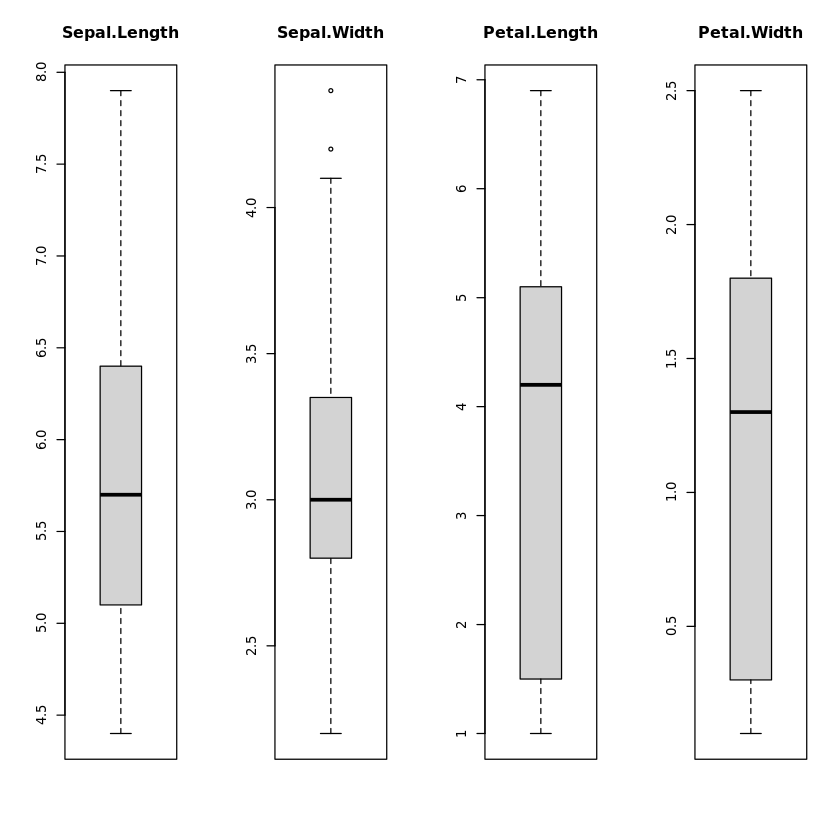

In [14]:
par(mfrow=c(1,4))
  for(i in 1:4) {
  boxplot(x[,i], main=names(iris)[i])
}

### barplot for class breakdown

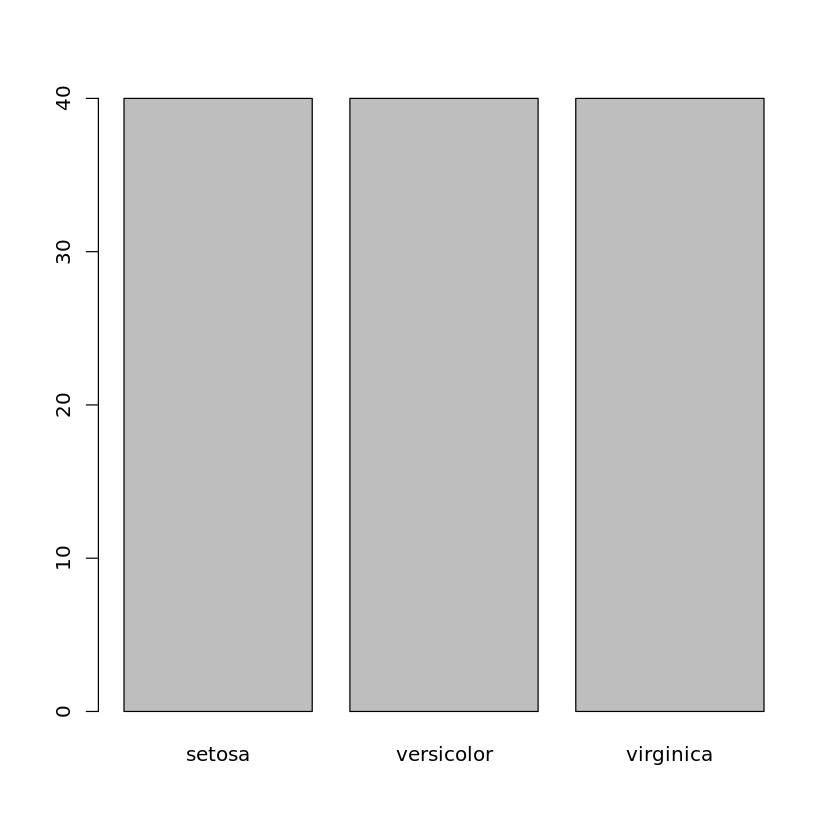

In [15]:
plot(y)

## multivariate plots

### scatterplot matrix

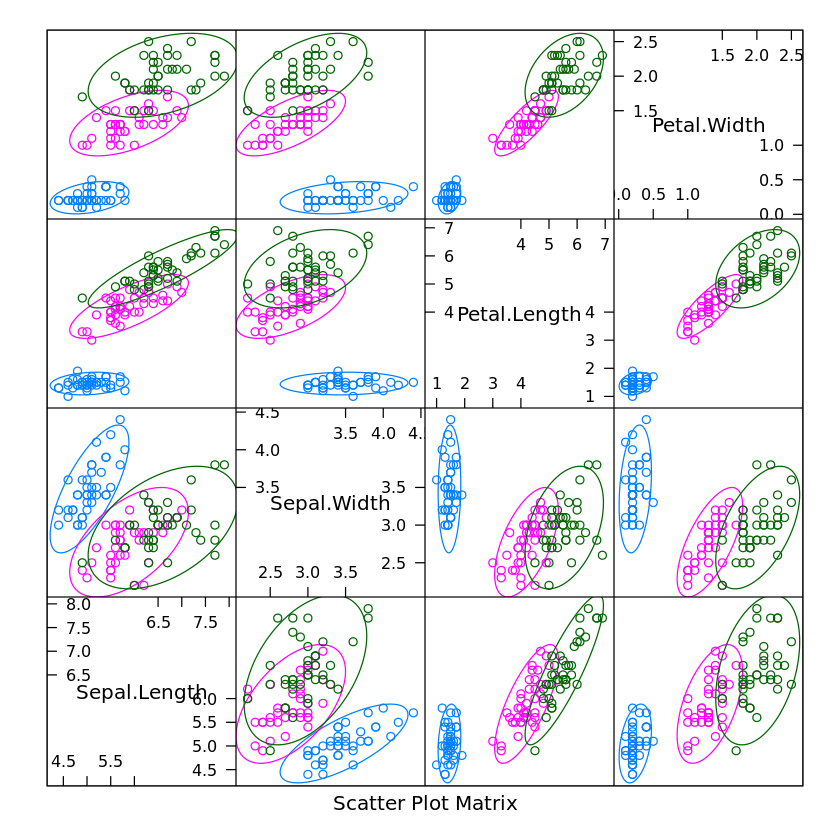

In [16]:
featurePlot(x=x, y=y, plot="ellipse")

### box and whisker plots for each attribute

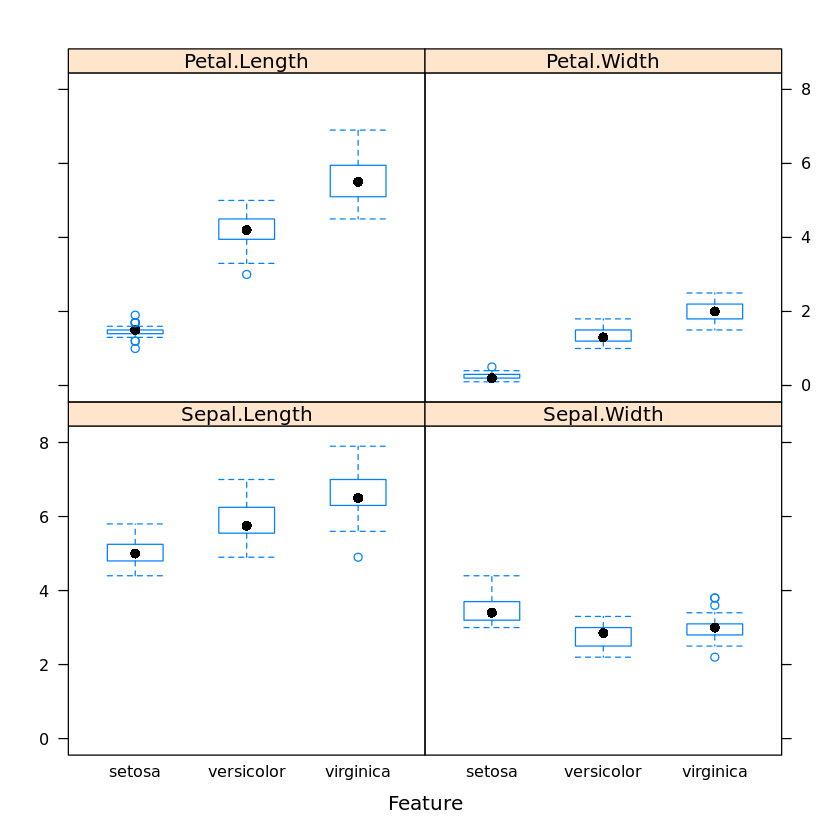

In [17]:
featurePlot(x=x, y=y, plot="box")

### density plots for each attribute by class value

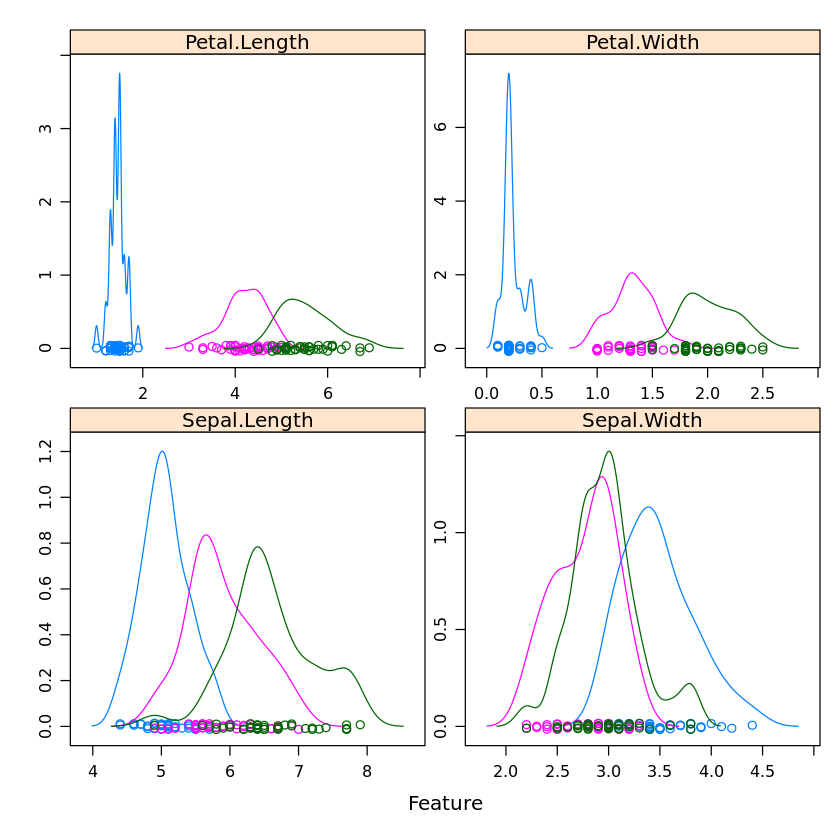

In [18]:
scales <- list(x=list(relation="free"), y=list(relation="free"))
featurePlot(x=x, y=y, plot="density", scales=scales)

# Evaluating Algorithms

### Run algorithms using 10-fold cross validation

In [19]:
control <- trainControl(method="cv", number=10)
metric <- "Accuracy"

### Building Models

In [20]:
# a) linear algorithms
set.seed(7)
fit.lda <- train(Species~., data=dataset, method="lda", metric=metric, trControl=control)
# b) nonlinear algorithms
# CART
set.seed(7)
fit.cart <- train(Species~., data=dataset, method="rpart", metric=metric, trControl=control)
# kNN
set.seed(7)
fit.knn <- train(Species~., data=dataset, method="knn", metric=metric, trControl=control)
# c) advanced algorithms
# SVM
set.seed(7)
fit.svm <- train(Species~., data=dataset, method="svmRadial", metric=metric, trControl=control)
# Random Forest
set.seed(7)
fit.rf <- train(Species~., data=dataset, method="rf", metric=metric, trControl=control)

### Selecting the Best Model

### summarize accuracy of models

In [21]:
results <- resamples(list(lda=fit.lda, cart=fit.cart, knn=fit.knn, svm=fit.svm, rf=fit.rf))
summary(results)


Call:
summary.resamples(object = results)

Models: lda, cart, knn, svm, rf 
Number of resamples: 10 

Accuracy 
          Min.   1st Qu.    Median      Mean 3rd Qu. Max. NA's
lda  0.9166667 1.0000000 1.0000000 0.9833333       1    1    0
cart 0.8333333 0.9166667 0.9583333 0.9500000       1    1    0
knn  0.9166667 0.9166667 1.0000000 0.9666667       1    1    0
svm  0.8333333 0.9166667 0.9583333 0.9416667       1    1    0
rf   0.8333333 0.9166667 1.0000000 0.9583333       1    1    0

Kappa 
      Min. 1st Qu. Median   Mean 3rd Qu. Max. NA's
lda  0.875   1.000 1.0000 0.9750       1    1    0
cart 0.750   0.875 0.9375 0.9250       1    1    0
knn  0.875   0.875 1.0000 0.9500       1    1    0
svm  0.750   0.875 0.9375 0.9125       1    1    0
rf   0.750   0.875 1.0000 0.9375       1    1    0


### compare accuracy of models

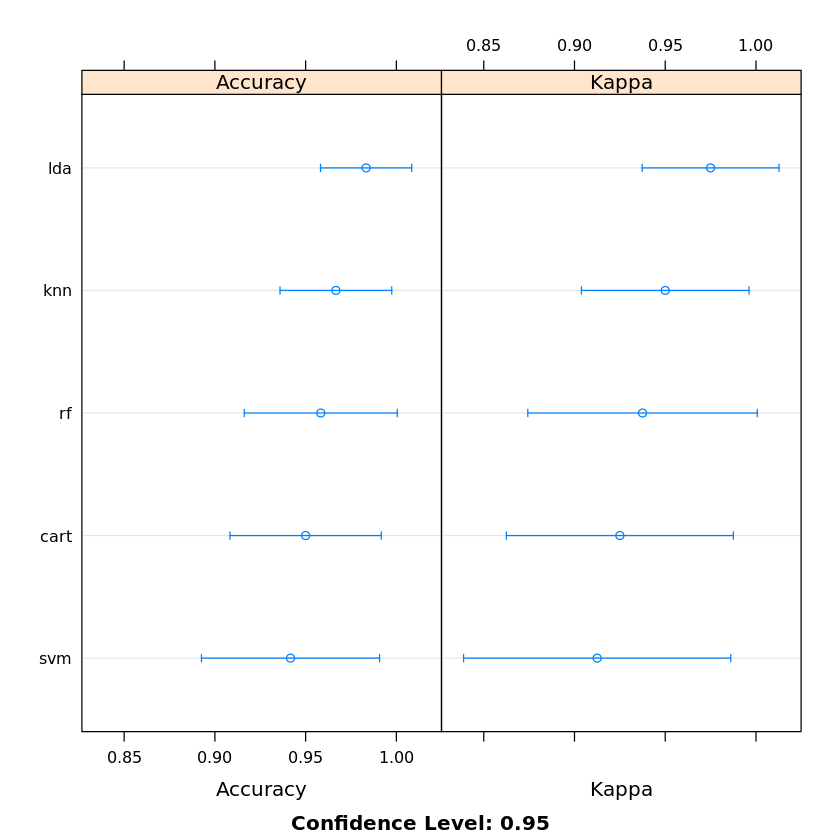

In [22]:
dotplot(results)

### summarize Best Model

In [23]:
print(fit.lda)

Linear Discriminant Analysis 

120 samples
  4 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 108, 108, 108, 108, 108, 108, ... 
Resampling results:

  Accuracy   Kappa
  0.9833333  0.975



# Make Predictions